<a href="https://colab.research.google.com/github/shapatel13/bamboolib/blob/master/Grids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from lightgbm import LGBMClassifier

In [0]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import KFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [0]:
pip install h2o

In [0]:
df= pd.read_csv('/content/drive/My Drive/allcomers.csv')

In [0]:
df= pd.read_csv('/content/drive/My Drive/mimic.csv')

In [0]:
df= pd.read_csv('/content/drive/My Drive/data_raw.csv')

In [0]:
df= pd.read_csv('/content/drive/My Drive/apachepf.csv')

In [0]:
df= pd.read_csv('/content/drive/My Drive/nosepsispf1.csv')

In [0]:
df= pd.read_csv('/content/drive/My Drive/sepsisfeat.csv')

In [0]:
df= pd.read_csv('/content/drive/My Drive/mimicall.csv')

ERROR! Session/line number was not unique in database. History logging moved to new session 60


In [0]:
pip install aethos

In [0]:
import aethos as at

In [46]:
pip install datacleaner

In [0]:
from datacleaner import autoclean
my_clean_data = autoclean(df)
df=pd.DataFrame(my_clean_data)

In [0]:
model = at.Model(df)

In [0]:
numfeat=df.dtypes[df.dtypes!='object'].index

In [0]:
from scipy.stats import shapiro

In [0]:
skew_feats= df[numfeat].skew().sort_values(ascending=False)

In [0]:
skewness= pd.DataFrame({'Skew':skew_feats})

In [0]:
skewness

In [0]:
df.shape

(148532, 39)

In [0]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

patientunitstayid - 0.0%
ANIONGAP_min - 0.0%
ANIONGAP_max - 0.0%
ALBUMIN_min - 0.0%
ALBUMIN_max - 0.0%
BICARBONATE_min - 0.0%
BICARBONATE_max - 0.0%
CREATININE_max - 0.0%
CHLORIDE_min - 0.0%
CHLORIDE_max - 0.0%
GLUCOSE_min - 0.0%
GLUCOSE_max - 0.0%
HEMATOCRIT_min - 0.0%
LACTATE_min - 0.0%
LACTATE_max - 0.0%
PLATELET_min - 0.0%
INR_max - 0.0%
PT_max - 0.0%
SODIUM_min - 0.0%
SODIUM_max - 0.0%
BILIRUBIN_max - 0.0%
BUN_min - 0.0%
BUN_max - 0.0%
PLATELET_max - 0.0%
WBC_min - 0.0%
WBC_max - 0.0%
gender - 0.0%
age - 0.0%
day1verbal - 0.0%
day1motor - 0.0%
day1eyes - 0.0%
admitdiagnosis - 0.0%
aids - 0.0%
hepaticfailure - 0.0%
lymphoma - 0.0%
metastaticcancer - 0.0%
leukemia - 0.0%
diabetes - 0.0%
actualicumortality - 0.0%


In [0]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[1.54353663 0.64679058 1.23077851 ... 0.08724347 0.55194235 0.2481375 ]
 [1.59126315 0.37498034 0.63120254 ... 0.08724347 0.55194235 0.2481375 ]
 [1.52708519 0.37498034 0.16823209 ... 0.08724347 1.81178342 0.2481375 ]
 ...
 [1.60701165 1.52769128 1.56724269 ... 0.08724347 1.81178342 0.2481375 ]
 [1.61378559 1.52769128 1.76710134 ... 0.08724347 0.55194235 0.2481375 ]
 [1.6018344  0.16864012 0.76780806 ... 0.08724347 0.55194235 0.2481375 ]]


In [0]:
threshold = 3
print(np.where(z > 4))

(array([     5,      7,      8, ..., 148519, 148522, 148522]), array([ 7, 35, 17, ..., 38, 20, 38]))


In [0]:
df = df[(z < 4).all(axis=1)]

In [0]:
df = df[df.age > 17]
df = df[df['gender'] != -1]
df.drop_duplicates(subset='patientunitstayid', inplace=True, keep='first') # Dataset is sorted by time of admission, removing all but the first unique occurence of patient unit stay id results in removing readmissions
df.set_index('patientunitstayid', inplace=True)
df.head()

,admitdiagnosis,gender,age,ANIONGAP_max,ALBUMIN_min,BICARBONATE_min,BILIRUBIN_max,CREATININE_max,CHLORIDE_max,CHLORIDE_min,GLUCOSE_min,HEMATOCRIT_min,LACTATE_max,PLATELET_min,PTT_max,INR_max,SODIUM_min,SODIUM_max,apachescore,diabetes,BUN_max,WBC_max,WBC_min,day1motor,day1pao2,day1fio2,actualicumortality
patientunitstayid,,,,,,,,,,,,,,,,,,,,,,,,,,,
2483078,4,0,77.0,14.0,2.4,21.0,0.8,0.69,87.0,83.0,57.0,26.0,2.5,125.0,35.0,1.4,119.0,122.0,63,0,13.0,8.5,8.5,6,-1.0,-1.0,0
2404962,4,1,73.0,10.0,2.7,26.0,0.5,1.53,103.0,103.0,130.0,39.3,2.2,281.0,35.0,1.4,139.0,139.0,57,0,57.0,22.6,22.6,6,-1.0,-1.0,0
2502236,5,0,65.0,14.0,2.9,24.0,0.5,1.40,104.0,104.0,116.0,30.6,1.0,74.0,35.0,1.2,142.0,142.0,53,1,14.0,7.4,7.4,5,-1.0,-1.0,0
2504689,4,0,68.0,7.0,3.2,27.0,0.6,1.71,100.0,100.0,140.0,37.3,2.5,105.0,34.5,1.2,134.0,134.0,33,1,34.0,8.4,8.4,6,-1.0,-1.0,0
2353536,4,0,83.0,14.0,3.1,23.0,0.9,1.79,92.0,92.0,157.0,36.8,2.5,298.0,35.0,1.4,129.0,129.0,63,0,41.0,8.3,8.3,6,83.7,73.0,0


In [0]:
df=df.drop(columns='patientunitstayid')

In [0]:
df=df.drop(columns='icustay_id')

In [0]:
df=df.drop(columns='admitdiagnosis')

In [0]:
df=df[df["day1motor"] > 0]

In [0]:
df=df[df["day1eyes"] > 0]
df=df[df["day1motor"] > 0]
df=df[df["day1verbal"] > 0]
df=df[df["age"] > 17]
df=df[df["age"] < 117]

In [0]:

df=df[df["admission_age"] > 17]
df=df[df["admission_age"] < 110]

In [0]:
df = at.Data(df, target_field='actualicumortality')

In [0]:
def categorical_summarized(df, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = df[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=df, palette=palette)
    plt.show()

In [0]:
# Target Variable: Survival
c_palette = ['tab:blue', 'tab:orange']
categorical_summarized(df, y = 'actualicumortality', palette=c_palette)

In [0]:
# Feature Variable: Gender
categorical_summarized(df, y = 'gender', hue='actualicumortality', palette=c_palette)

In [0]:
def quantitative_summarized(df, x=None, y=None, hue=None, palette='Set1', ax=None, verbose=True, swarm=False):
    '''
    Helper function that gives a quick summary of quantattive data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data (usually the target variable)
    y: str. vertical axis to plot the quantitative data
    hue: str. if you want to compare it another categorical variable (usually the target variable if x is another variable)
    palette: array-like. Colour of the plot
    swarm: if swarm is set to True, a swarm plot would be overlayed
    Returns
    =======
    Quick Stats of the data and also the box plot of the distribution
    '''
    series = df[y]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.boxplot(x=x, y=y, hue=hue, data=df, palette=palette, ax=ax)

    if swarm:
        sns.swarmplot(x=x, y=y, hue=hue, data=df,
                      palette=palette, ax=ax)

    plt.show()

In [0]:
X =  df[[	'ANIONGAP_max','day1motor','ALBUMIN_min','age',		
         'CREATININE_max','GLUCOSE_min'	,'HEMATOCRIT_min','PLATELET_min',	'metastaticcancer',
         'INR_max', 'BILIRUBIN_max','WBC_max','PT_max','BICARBONATE_min','SODIUM_min','CHLORIDE_max','LACTATE_max','diabetes','leukemia','hepaticfailure','aids']]

In [0]:
y=df['actualicumortality']

In [0]:
X=pd.DataFrame(Xs,columns=X.columns)

In [0]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [0]:

X =  df[[	'LACTATE_max','CHLORIDE_max','ALBUMIN_min','age',		
         'CREATININE_max','GLUCOSE_min'	,'BUN_max','PT_max','HEMATOCRIT_min','PLATELET_min',
       'WBC_max','day1motor']]

In [0]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(X))
print(z)

[[0.6467895  1.23125991 2.01112643 ... 0.14637579 0.08768308 0.5540637 ]
 [0.37505211 0.63185902 1.69240048 ... 0.14637579 0.08768308 0.5540637 ]
 [0.37505211 0.16734216 0.09877078 ... 0.14637579 0.08768308 1.80484664]
 ...
 [1.52710965 1.56594424 1.37367454 ... 0.14637579 0.08768308 1.80484664]
 [1.52710965 1.76574454 0.06059219 ... 0.14637579 0.08768308 0.5540637 ]
 [0.16842268 0.76674306 0.57685969 ... 0.14637579 0.08768308 0.5540637 ]]


In [0]:
threshold = 3
print(np.where(z > 4))

(array([     5,      7,      8, ..., 145865, 145865, 145868]), array([ 6, 33, 16, ..., 24, 34, 19]))


In [0]:
X = X[(z < 4).all(axis=1)]

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
y=df['actualicumortality']

In [0]:
model = lgb.LGBMClassifier()
model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
clf  = Pipeline([('scale', StandardScaler()),('pca', PCA(n_components=8)), ('clf', LogisticRegression(C=1.0,
                                                           class_weight={0:1,1:20},
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=42,
                                                           solver='lbfgs',
                                                           tol=0.0001,
                                                           verbose=0,
                                                           warm_start=False ))])

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
clf  = Pipeline([('scale', PowerTransformer()),('pca', PCA(n_components=10)), ('clf', LogisticRegression(C=1.0,
                                                           class_weight={0:1,1:20},
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=42,
                                                           solver='lbfgs',
                                                           tol=0.0001,
                                                           verbose=0,
                                                           warm_start=False ))])

In [0]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [0]:
from imblearn.combine import SMOTEENN 
smo = SMOTEENN() 
X_train, y_train = smo.fit_sample(X_train, y_train) 
clf = LogisticRegression() 
clf.fit(X_train, y_train)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)


In [0]:
from imblearn.over_sampling import ADASYN 
ada = ADASYN() 
X_resampled, y_resampled = ada.fit_sample(X_train, y_train) 
clf = LogisticRegression() 
clf.fit(X_resampled, y_resampled)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
clf = LogisticRegression()

In [0]:
clf = LogisticRegression(class_weight={0:1,1:20})

In [0]:
from sklearn.metrics import classification_report

In [56]:
from sklearn.metrics import roc_auc_score
from timeit import default_timer as timer

start = timer()
clf.fit(X_train, y_train)
train_time = timer() - start

predictions = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, predictions)

print('The baseline score on the test set is {:.4f}.'.format(auc))
print('The baseline training time is {:.4f} seconds'.format(train_time))

The baseline score on the test set is 0.8581.
The baseline training time is 14.4008 seconds


In [0]:
import pickle
filename='clf_model.sav'

In [0]:
pickle.dump(clf, open(filename, 'wb'))

In [0]:
load_lr_model =pickle.load(open(filename, 'rb'))

In [0]:
y_load_predit=load_lr_model.predict(X_test)

In [65]:
y_load_predit.shape

(29176,)

In [0]:
pip install catboost

     |████████████████████████████████| 64.4MB 48kB/s 


In [0]:
from catboost import CatBoostClassifier

In [0]:
clf = CatBoostClassifier(iterations=200,depth=4,eval_metric='AUC',l2_leaf_reg=9,learning_rate=0.1)

In [0]:
from sklearn.metrics import roc_auc_score
from timeit import default_timer as timer

start = timer()
clf.fit(X_train, y_train)
train_time = timer() - start

predictions = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, predictions)

print('The baseline score on the test set is {:.4f}.'.format(auc))
print('The baseline training time is {:.4f} seconds'.format(train_time))

0:	total: 105ms	remaining: 21s
1:	total: 156ms	remaining: 15.5s
2:	total: 209ms	remaining: 13.8s
3:	total: 262ms	remaining: 12.8s
4:	total: 323ms	remaining: 12.6s
5:	total: 386ms	remaining: 12.5s
6:	total: 449ms	remaining: 12.4s
7:	total: 504ms	remaining: 12.1s
8:	total: 559ms	remaining: 11.9s
9:	total: 610ms	remaining: 11.6s
10:	total: 663ms	remaining: 11.4s
11:	total: 712ms	remaining: 11.2s
12:	total: 776ms	remaining: 11.2s
13:	total: 824ms	remaining: 10.9s
14:	total: 873ms	remaining: 10.8s
15:	total: 922ms	remaining: 10.6s
16:	total: 972ms	remaining: 10.5s
17:	total: 1.03s	remaining: 10.4s
18:	total: 1.08s	remaining: 10.3s
19:	total: 1.13s	remaining: 10.2s
20:	total: 1.18s	remaining: 10s
21:	total: 1.22s	remaining: 9.91s
22:	total: 1.27s	remaining: 9.79s
23:	total: 1.32s	remaining: 9.67s
24:	total: 1.37s	remaining: 9.62s
25:	total: 1.43s	remaining: 9.55s
26:	total: 1.49s	remaining: 9.52s
27:	total: 1.54s	remaining: 9.44s
28:	total: 1.59s	remaining: 9.4s
29:	total: 1.65s	remaining: 9

In [0]:
lr = model.LogisticRegression(C=0.1)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [0]:
lr = model.LogisticRegression(gridsearch={'C': [0.01, 0.1]}, tol=0.001)

In [0]:
lr = model.LogisticRegression(cv=5, C=0.001)

In [0]:
lr = model.LogisticRegression(cv=5, gridsearch={'C': [0.01, 0.1]}, tol=0.001)

In [0]:
lgbm.summary_plot(output_file='summary_plot.png')

In [0]:
lgbm.interpret_model()

In [0]:
X =  df[[	'ANIONGAP_max','GCSMotor','ALBUMIN_min','admission_age','mechvent','TempC_Max','TempC_Min','HeartRate_Max','preiculos','DiasBP_Min','MeanBP_Min',		
         'CREATININE_max','Glucose_Min','HEMATOCRIT_min','PLATELET_min',
         'INR_max', 'BILIRUBIN_max','WBC_max','PT_max','BICARBONATE_min','SODIUM_min','CHLORIDE_max','LACTATE_max']]


In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [0]:
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

In [0]:
y = df.iloc[:, -1].values

In [0]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [0]:
X_train.values
X_test.values

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(y_test, predictions))

ValueError: ignored

In [0]:
pip install keras

In [0]:
import keras

Using TensorFlow backend.


In [0]:
X_train=pd.DataFrame(X_train)

In [0]:
import tensorflow as tf


In [0]:
classifier = keras.Sequential()

# Adding the input layer and the first hidden layer
classifier.add(keras.layers.Dense(units =64 , kernel_initializer = 'uniform', activation = 'relu', input_dim =10))
# Adding the output layer
classifier.add(keras.layers.Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
# And finally
# Fitting the ANN to the Training set
model = classifier.fit(X_train, y_train, batch_size = 128, epochs = 5)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [0]:


# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred)))

AUC: 0.765973673606631


In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
X = preprocessing.normalize(X)

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90     27322
           1       0.20      0.70      0.31      1605

    accuracy                           0.83     28927
   macro avg       0.59      0.77      0.60     28927
weighted avg       0.94      0.83      0.87     28927



In [0]:
# Learning rate = 0.01
XGB_classifier = XGBClassifier(n_estimators=10000, learning_rate=.01, maximize=True)
XGB_classifier.fit(X_train,y_train, eval_metric = 'aucpr')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3, maximize=True,
              min_child_weight=1, missing=None, n_estimators=10000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
XGB_classifierpred = XGB_classifier.predict(X_test)

ValueError: ignored

In [0]:
classification_report(y_test,XGB_classifier_predict)

'              precision    recall  f1-score   support\n\n           0       0.96      0.99      0.97     27322\n           1       0.56      0.24      0.34      1605\n\n    accuracy                           0.95     28927\n   macro avg       0.76      0.62      0.66     28927\nweighted avg       0.94      0.95      0.94     28927\n'

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
>>> from sklearn.experimental import enable_iterative_imputer  # noqa
>>> # now you can import normally from sklearn.impute
>>> from sklearn.impute import IterativeImputer

In [0]:
from impyute.imputation.cs import mice

In [0]:

X =  df[[	'ANIONGAP_max','day1motor','ALBUMIN_min','age',		
         'CREATININE_max','GLUCOSE_min'	,'HEMATOCRIT_min','PLATELET_min',	'metastaticcancer',
         'INR_max', 'BILIRUBIN_max','WBC_max','PT_max','BICARBONATE_min','SODIUM_min','CHLORIDE_max','LACTATE_max','diabetes','leukemia','hepaticfailure','aids']]

In [0]:
X =  df[[	'aids','age',		
         	'metastaticcancer',
         'PLATELET_min', 'BILIRUBIN_max','LACTATE_max','leukemia','hepaticfailure','CREATININE_max','immunosuppression']]

In [0]:

X =  df[[	'LACTATE_max','day1motor','ALBUMIN_min','age',		
         'CREATININE_max','GLUCOSE_min'	,'PT_max','pf','PLATELET_min',
       'WBC_max']]

In [0]:

X =  df[[	'LACTATE_max','day1motor','ALBUMIN_min','admission_age',		
         'CREATININE_max','GLUCOSE_min'	,'PT_max','BUN_max','PLATELET_min',
       'WBC_max']]

In [0]:

X =  df[[	'LACTATE_max','day1motor','ALBUMIN_min','age',		
         'CREATININE_max','GLUCOSE_min'	,'PLATELET_min',	
         'PT_max','WBC_min','BUN_max']]

In [0]:

X =  df[[	'apachescore']]

In [0]:
X =  df[[	'acutephysiologyscore']]

In [0]:
y=df['icustay_expire_flag']

In [0]:
y=df['actualicumortality']

In [0]:
from sklearn import preprocessing

In [0]:
X = preprocessing.normalize(X)

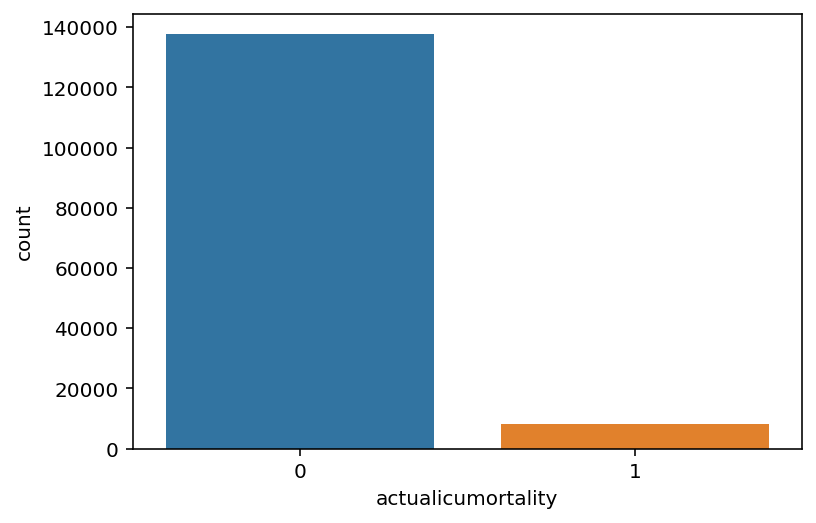

In [0]:
sns.countplot(y)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

In [0]:
np.bincount(y)

array([136451,   8184])

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()
X= scaler.fit_transform(X)

In [0]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

In [0]:

# Create a PCA instance: pca
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

NameError: ignored

Text(0, 0.5, 'PCA 2')

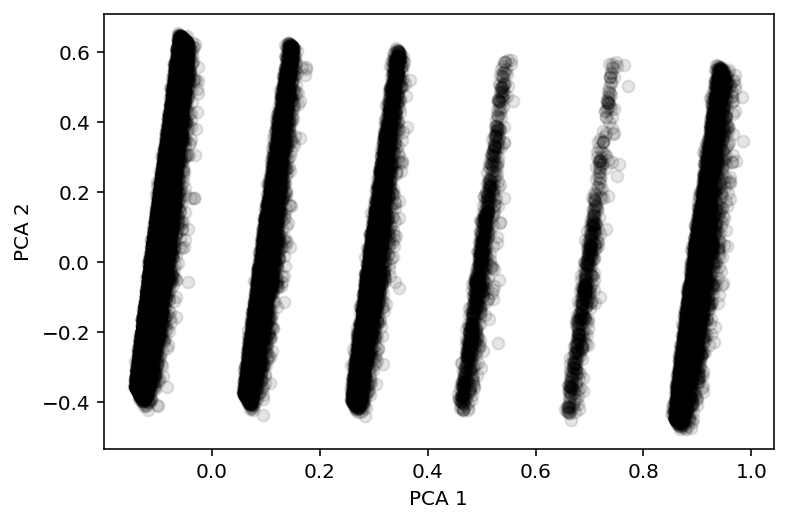

In [0]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, perplexity=25)
X_hat = tsne.fit_transform(X_std)

# To plot the embedding
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_hat[:,0], X_hat[:,1], c = y, s = 0.5)

In [0]:
plt.scatter(X_hat[:,0], X_hat[:,1], c = y, s = 0.5)

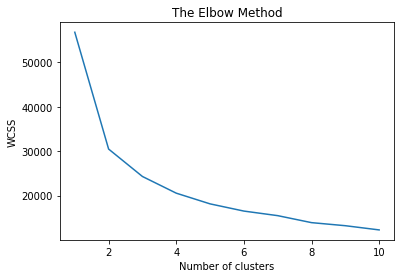

In [35]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
from sklearn.mixture import GaussianMixture
Y_sklearn = principalComponents
gmm = GaussianMixture(n_components=4, covariance_type='full').fit(X_std)
labels = gmm.fit_predict(X_std)
probs = gmm.predict_proba(X_std)

In [0]:
pip install hdbscan

     |████████████████████████████████| 4.7MB 2.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2361286 sha256=6be8fdfb78730e0a247ed3d11986f875e55722e73d1aac09a7269bfcb13538c3
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


array([-1,  0,  1,  2,  3,  4,  5])

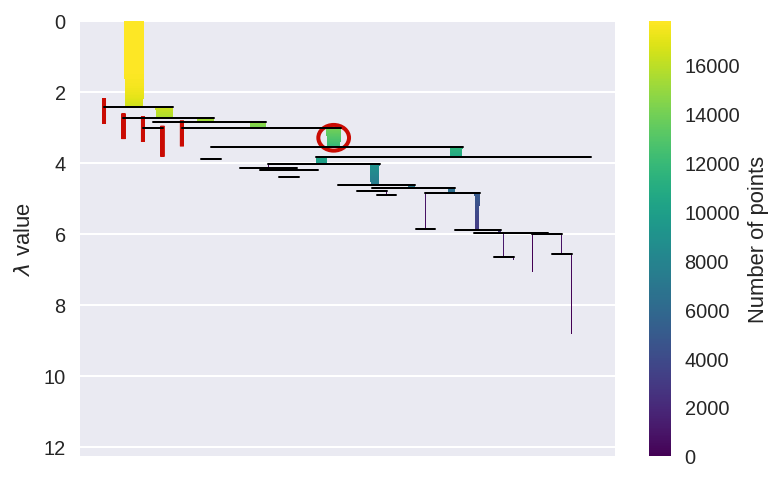

In [0]:
import hdbscan
hdbscan = hdbscan.HDBSCAN(min_cluster_size=10, min_samples = 5)
labels = hdbscan.fit_predict(X_std)
hdbscan.condensed_tree_.plot(select_clusters=True)
np.unique(labels)

array([-1,  0,  1,  2,  3])

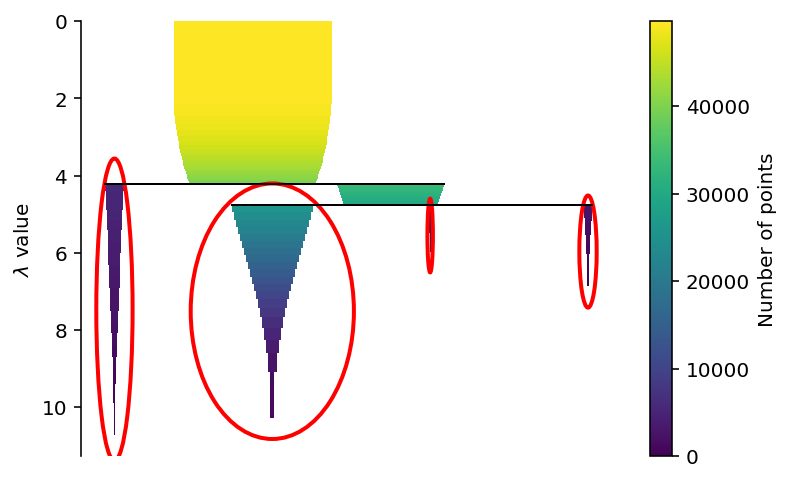

In [0]:
import hdbscan
hdbscan = hdbscan.HDBSCAN(min_cluster_size=100, min_samples = 10)
labels = hdbscan.fit_predict(X_std)
hdbscan.condensed_tree_.plot(select_clusters=True)
np.unique(labels)

In [0]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=.4, min_samples=4)
labels = dbscan.fit_predict(X_std)
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5])

In [0]:
kmeans = KMeans(n_clusters=3,init='k-means++')
labels = kmeans.fit_predict(X)

In [0]:
X=X_hat

In [0]:
X=principalComponents

In [0]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=.8, min_samples=4)
labels = dbscan.fit_predict(PCA_components)
np.unique(labels)

array([0])

In [0]:
labels=pd.DataFrame(labels)

In [0]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14380 entries, 0 to 14379
Data columns (total 1 columns):
0    14380 non-null int64
dtypes: int64(1)
memory usage: 112.5 KB


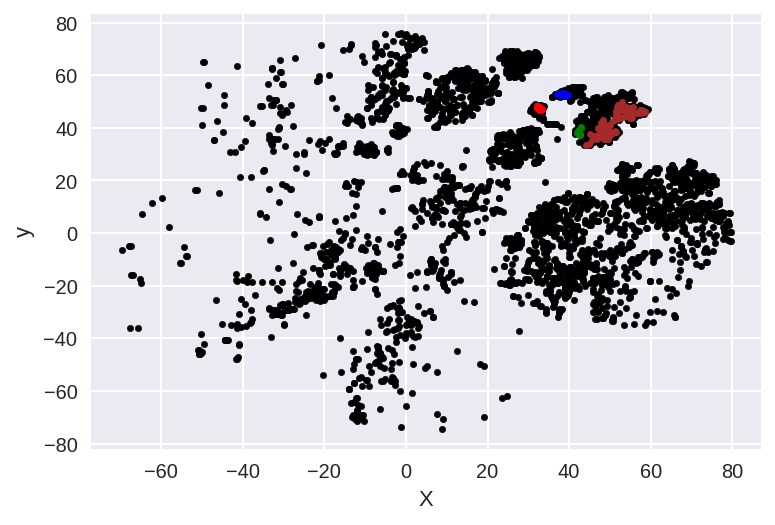

In [0]:
plt.scatter(Xs[labels == -1, 0], Xs[labels == -1, 1], s = 10, c = 'black') # this line has been added 

plt.scatter(Xs[labels == 0, 0], Xs[labels == 0, 1], s = 10, c = 'blue')
plt.scatter(Xs[labels == 1, 0], Xs[labels == 1, 1], s = 10, c = 'red')
plt.scatter(Xs[labels == 2, 0], Xs[labels == 2, 1], s = 10, c = 'green')
plt.scatter(Xs[labels == 3, 0], Xs[labels == 3, 1], s = 10, c = 'brown')




plt.xlabel('X')
plt.ylabel('y')
plt.show()

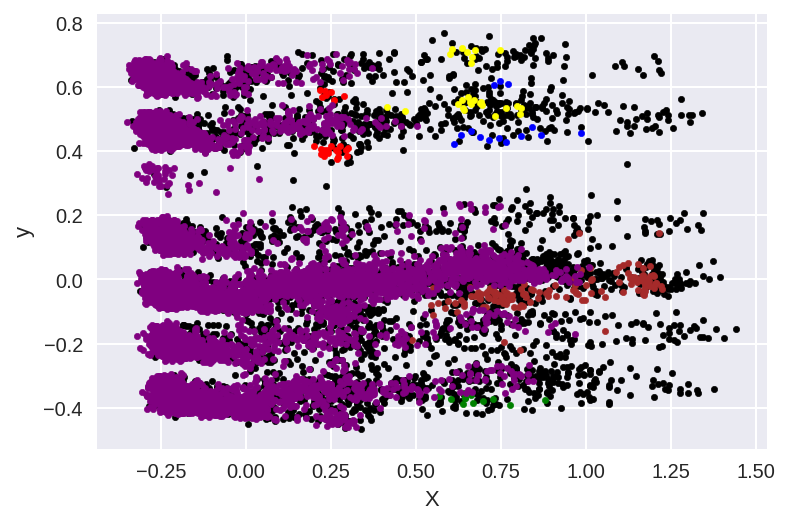

In [0]:
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], s = 10, c = 'black') # this line has been added 

plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 10, c = 'blue')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 10, c = 'red')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 10, c = 'green')
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], s = 10, c = 'brown')
plt.scatter(X[labels == 4, 0], X[labels == 4, 1], s = 10, c = 'yellow')
plt.scatter(X[labels == 5, 0], X[labels == 5, 1], s = 10, c = 'purple')


plt.xlabel('X')
plt.ylabel('y')
plt.show()

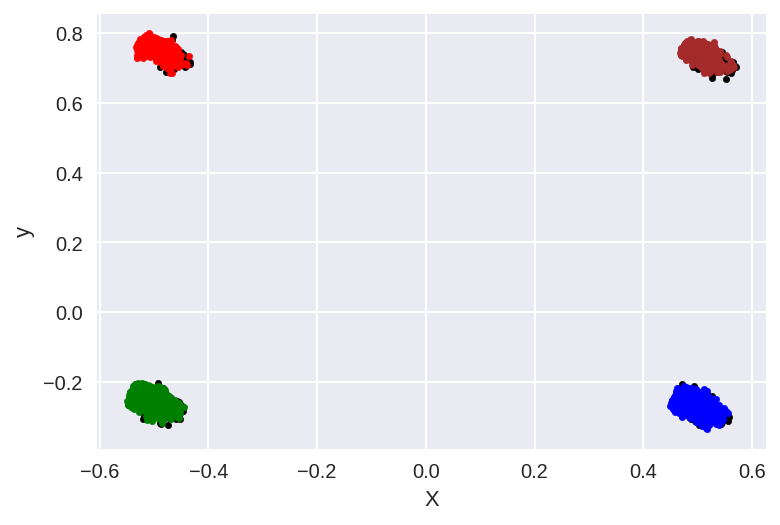

In [0]:
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], s = 10, c = 'black') # this line has been added 

plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 10, c = 'blue')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 10, c = 'red')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 10, c = 'green')
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], s = 10, c = 'brown')



plt.xlabel('X')
plt.ylabel('y')
plt.show()

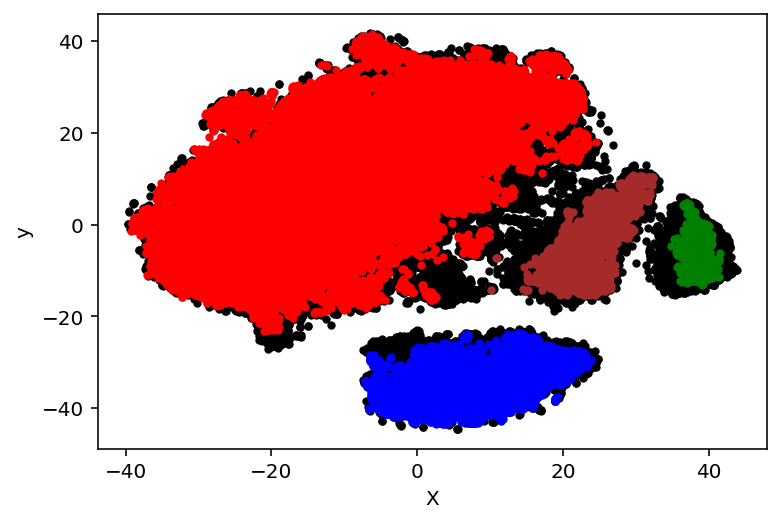

In [0]:
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], s = 10, c = 'black') # this line has been added 

plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 10, c = 'blue')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 10, c = 'red')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 10, c = 'green')
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], s = 10, c = 'brown')
plt.scatter(X[labels == 4, 0], X[labels == 4, 1], s = 10, c = 'purple')



plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [0]:
labels[]

-1

In [0]:
imputed = mice(X)
X = imputed

/usr/local/lib/python3.6/dist-packages/impyute/util/preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [0]:
X.to_csv('data.csv')
!cp data.csv "drive/My Drive/"

In [0]:
imputer = IterativeImputer(random_state=10, sample_posterior=True)
X = pd.DataFrame(imputer.fit_transform(X))

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb

RangeIndex(start=0, stop=21, step=1)

In [0]:
gbm = lgb.LGBMClassifier(class_weight='balanced')
gbm.fit(X,y)
gbm.booster_.feature_importance()

# importance of each attribute
fea_imp_ = pd.DataFrame({'cols':X.columns, 'fea_imp':gbm.feature_importances_})
fea_imp_.loc[fea_imp_.fea_imp > 150].sort_values(by=['fea_imp'], ascending = False)

In [0]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["actualicumortality"] = lb_make.fit_transform(df["actualicumortality"])



In [0]:
y=df['actualicumortality']

In [0]:
imputer = IterativeImputer(ExtraTreesRegressor())
X = pd.DataFrame(imputer.fit_transform(X))

In [0]:
import pandas as pd
import numpy as np
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge

In [0]:
imputer = IterativeImputer(BayesianRidge())
X = pd.DataFrame(imputer.fit_transform(X))

In [26]:
model   =SGDClassifier(loss='log')
model

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
wandb.sklearn.plot_learning_curve(model, X, y)

In [29]:
# Plot feature importances
wandb.sklearn.plot_feature_importances(model)

wandb: WARNING feature_importances_ attribute not in classifier. Cannot plot feature importances.


In [0]:
pip install imblearn

In [0]:
pipeline = Pipeline([('scale', StandardScaler()),("clf",XGBClassifier(booster='gbtree',max_depth=6,colsample_bylevel=1,colsample_bynode=1,colsample_bytree=1,gamm=0,learning_rate=0.6000000000000001,max_delta_step=0,min_child_weight=1,missing=None,n_estimators=10000,n_jobs=1,nthread=None,objective='binary:logistic',reg_alpha=0,reg_lambda=1,scale_pos_weight=1,silent=None,subsample=1,verbosity=2))])

In [0]:
xg=('clf),XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0,
                               learning_rate=0.6000000000000001,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=None,
                               n_estimators=50, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1)

In [0]:
pipeline = Pipeline([('scale', StandardScaler()),("clf"),XGBClassifier(base_score=0.5, booster='gbtree')]
                               ]

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
pipeline  = Pipeline([('scale', StandardScaler()),('pca', PCA(n_components=3)), ('clf', LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=42,
                                                           solver='lbfgs',
                                                           tol=0.0001,
                                                           verbose=0,
                                                           warm_start=False ))])

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
clf   =SGDClassifier(loss='log')

In [23]:
from sklearn.metrics import roc_auc_score
from timeit import default_timer as timer

start = timer()
clf.fit(X_train, y_train)
train_time = timer() - start

predictions = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, predictions)

print('The baseline score on the test set is {:.4f}.'.format(auc))
print('The baseline training time is {:.4f} seconds'.format(train_time))

The baseline score on the test set is 0.8208.
The baseline training time is 28.7175 seconds


In [0]:
wandb.sklearn.plot_classifier(clf, X_train, X_test, y_train, y_test, predictions, y_probas, labels,
                                                          feature_names=None)

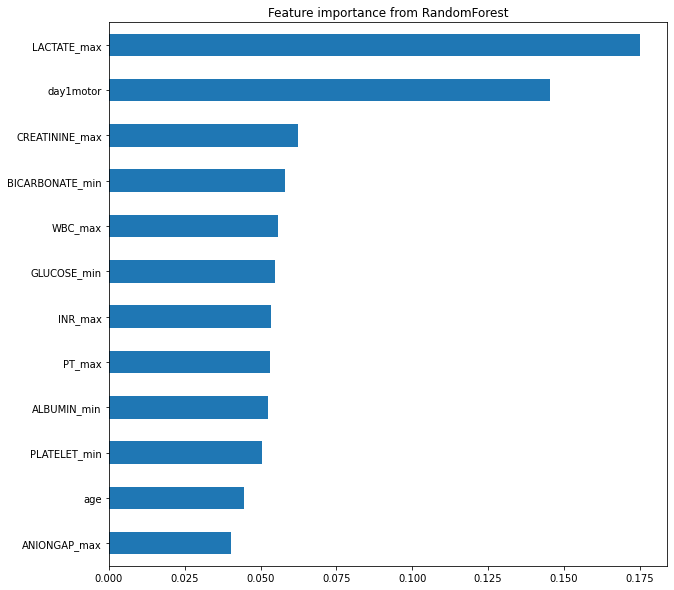

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 500, max_depth=12)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)

pd.Series(rf_clf.feature_importances_, index = X_train.columns).nlargest(12).plot(kind = ',s',
                                                                               figsize = (10, 10),
                                                                              title = 'Feature importance from RandomForest').invert_yaxis();


In [0]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(max_depth=12, learning_rate=1e-4,n_estimators=500)
xgb_clf.fit(X_train, y_train)
xgb_y_pred = xgb_clf.predict(X_test)

pd.Series(xgb_clf.feature_importances_, index = X_train.columns).nlargest(12).plot(kind = 'barh',
                                                                               figsize = (10, 10),
                                                                              title = 'Feature importance from XGBoost').invert_yaxis();


In [0]:
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
xgbc=XGBClassifier(n_estimators=2000,verbose=1,tree_method='gpu_hist',random_state=123)
embeded_xgb_selector = SelectFromModel(xgbc, max_features=10)
embeded_xgb_selector.fit(xTrain, yTrain)
embeded_xgb_support = embeded_xgb_selector.get_support()
embeded_xgb_feature = xTrain.loc[:,embeded_xgb_support].columns.tolist()
final_selected_cols=embeded_xgb_feature
final_tr=xTrain[embeded_xgb_feature]

In [0]:
final_tr

In [0]:
from imblearn.over_sampling import SVMSMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
sm =  SVMSMOTE(random_state=42)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [0]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_sample(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 500, max_depth=12)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)

pd.Series(rf_clf.feature_importances_, index = X_train.columns).nlargest(12).plot(kind = 'barh',
                                                                               figsize = (10, 10),
                                                                              title = 'Feature importance from RandomForest').invert_yaxis();


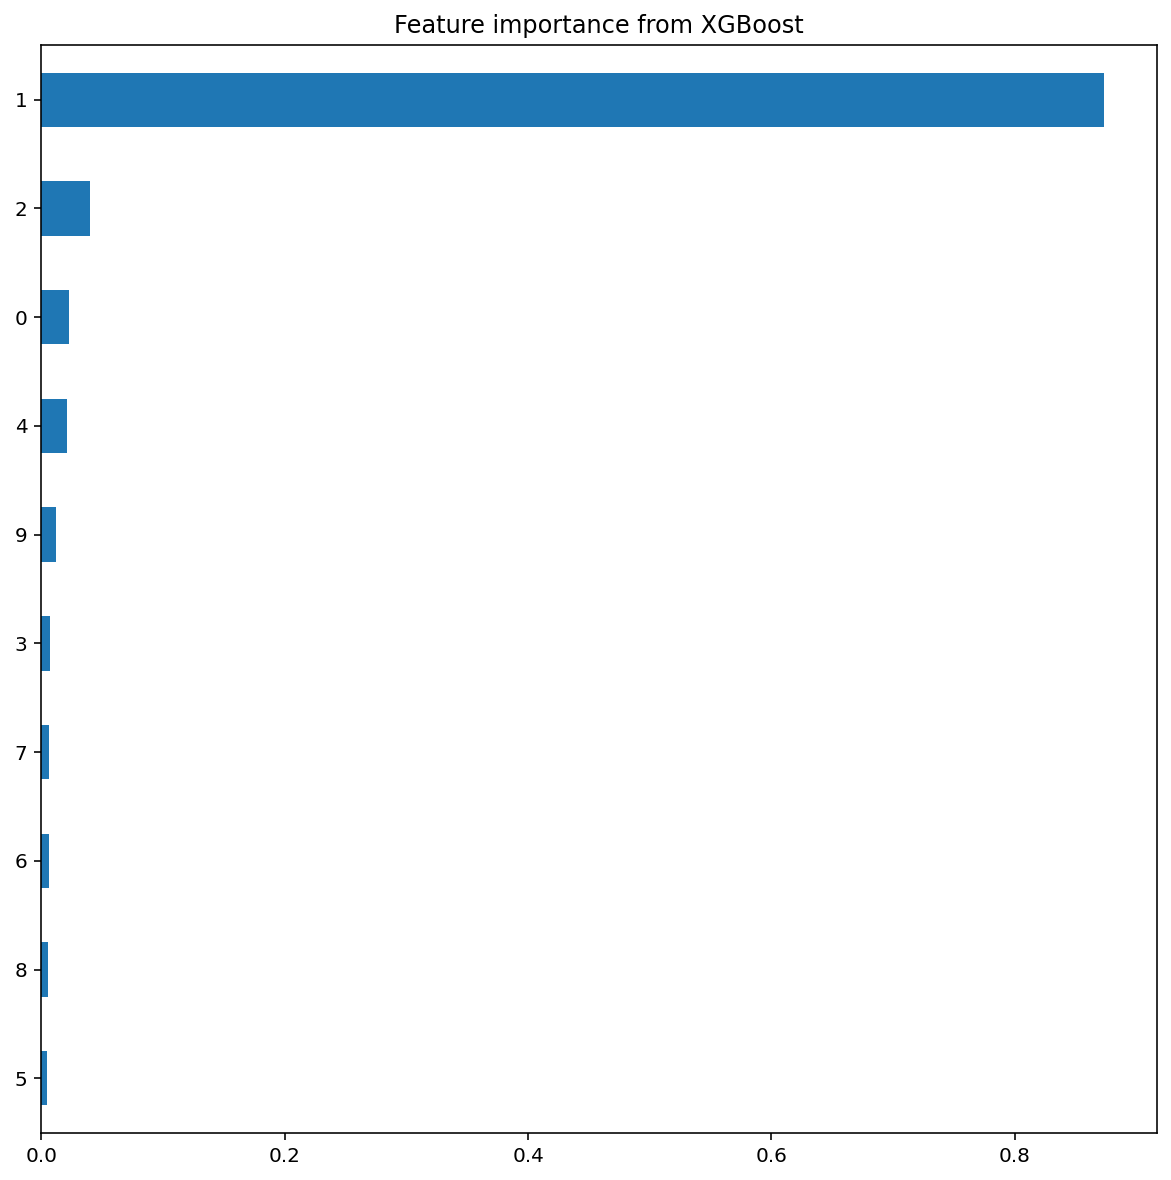

In [0]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(max_depth=12, learning_rate=1e-4,n_estimators=500)
xgb_clf.fit(X_train, y_train)
xgb_y_pred = xgb_clf.predict(X_test)

pd.Series(xgb_clf.feature_importances_, index = X_train.columns).nlargest(12).plot(kind = 'barh',
                                                                               figsize = (10, 10),
                                                                              title = 'Feature importance from XGBoost').invert_yaxis();

In [0]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [0]:
model = XGBClassifier(n_estimators=100, learning_rate=.01, maximize=True)

In [0]:
model   =SGDClassifier(loss='log')
model

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
model = lgb.LGBMClassifier()
model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
from sklearn.metrics import roc_auc_score
from timeit import default_timer as timer

start = timer()
model.fit(X_train, y_train)
train_time = timer() - start

predictions = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, predictions)

print('The baseline score on the test set is {:.4f}.'.format(auc))
print('The baseline training time is {:.4f} seconds'.format(train_time))

The baseline score on the test set is 0.8267.
The baseline training time is 16.6598 seconds


In [0]:
pip install catboost

     |████████████████████████████████| 64.4MB 48kB/s 


In [0]:
from catboost import CatBoostClassifier, Pool, cv

In [0]:
params = {
    'iterations': 500,
    'learning_rate': 0.1,
    'eval_metric': 'AUC',
    'random_seed': 42,
    'logging_level': 'Silent',
    'use_best_model': False
}
train_pool = Pool(X_train, y_train)
validate_pool = Pool(X_test, y_test)

In [0]:
model.fit(train_pool, eval_set=validate_pool)

best_model_params = params.copy()
best_model_params.update({
    'use_best_model': True
})
best_model = CatBoostClassifier(**best_model_params)
best_model.fit(train_pool, eval_set=validate_pool);

print('Simple model validation accuracy: {:.4}'.format(
    accuracy_score(y_test, model.predict(X_test))
))
print('')

print('Best model validation accuracy: {:.4}'.format(
    accuracy_score(y_test, best_model.predict(X_test))
))

In [0]:
model = best_model
eval_metrics = model.eval_metrics(validate_pool, ['AUC'], plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [0]:
print(eval_metrics['AUC'][:6])

[0.8169921264367423, 0.8274032816433347, 0.8339448930386226, 0.8343392553237825, 0.8366475408882781, 0.8352451814417694]


In [0]:
pip install hyperopt

In [0]:
train_set = lgb.Dataset(X_test,label=y_test)

In [0]:
r = lgb.cv(params, train_set, num_boost_round = 10000, nfold = 10, metrics = 'auc', 
           early_stopping_rounds = 100, verbose_eval = False, seed = 50)

# Highest score
r_best = np.max(r['auc-mean'])

# Standard deviation of best score
r_best_std = r['auc-stdv'][np.argmax(r['auc-mean'])]

print('The maximium ROC AUC on the validation set was {:.5f} with std of {:.5f}.'.format(r_best, r_best_std))
print('The ideal number of iterations was {}.'.format(np.argmax(r['auc-mean']) + 1))

The maximium ROC AUC on the validation set was 0.85818 with std of 0.01702.
The ideal number of iterations was 52.


In [0]:
MAX_EVALS = 500
N_FOLDS = 10

In [0]:
random_results = pd.DataFrame(columns = ['loss', 'params', 'iteration', 'estimators', 'time'],
                       index = list(range(MAX_EVALS)))

In [0]:
import os
import numpy as np  # linear algebra
import pandas as pd  #
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [0]:
X_train=pd.DataFrame(X_train)
y_train=pd.DataFrame(y_train)

In [0]:
#Results dataframe
cols = ['Case','SGD','Ridge','Bagging','RndForest','LogReg','LGB']
resul = pd.DataFrame(columns=cols)
resul.set_index("Case",inplace=True)
resul.loc['Standard'] = [0,0,0,0,0,0]
resul.loc['GridSearch'] = [0,0,0,0,0,0]
resul.loc['RandomSearch'] = [0,0,0,0,0,0]
resul.loc['Hyperopt'] = [0,0,0,0,0,0]
resul.head()

,SGD,Ridge,Bagging,RndForest,LogReg,LGB
Case,,,,,,
Standard,0,0,0,0,0,0
GridSearch,0,0,0,0,0,0
RandomSearch,0,0,0,0,0,0
Hyperopt,0,0,0,0,0,0


In [0]:
#Models creation
sgd   = SGDClassifier()
ridge = RidgeClassifier()
bag   = BaggingClassifier()
rf    = RandomForestClassifier(n_estimators=10)
lr    =  LogisticRegression(solver='liblinear')
lgg   = lgb.LGBMClassifier()
models = [sgd,ridge,bag,rf,lr,lgg]
col = 0
for model in models:
    model.fit(X_train,y_train.values.ravel())
    resul.iloc[0,col] = model.score(X_test,y_test)
    col += 1
resul.head()

,SGD,Ridge,Bagging,RndForest,LogReg,LGB
Case,,,,,,
Standard,0.839665,0.831922,0.93449,0.933833,0.820894,0.94417
GridSearch,0,0,0,0,0,0
RandomSearch,0,0,0,0,0,0
Hyperopt,0,0,0,0,0,0


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
#SGD
loss = ['hinge', 'modified_huber', 'log']
penalty = ['l1','l2']
alpha= [0.0001,0.001,0.01,0.1]
l1_ratio= [0.15,0.05,.025]
max_iter = [1,5,10,100,1000,10000]
sgd_grid = dict(loss=loss,penalty=penalty,max_iter=max_iter,alpha=alpha,l1_ratio=l1_ratio)
#Ridge
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ridge_grid = dict(alpha=alpha)
#Bagging Classifier
n_estimators = [10, 100, 1000]
bag_grid = dict(n_estimators=n_estimators)
#Random Forest
n_estimators = [10, 100, 1000,10000]
max_features = ['sqrt', 'log2']
rf_grid = dict(n_estimators=n_estimators,max_features=max_features)
#Logistic Regrresion
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
lr_grid = dict(solver=solvers,penalty=penalty,C=c_values)
#LGB
class_weight = [None,'balanced']
boosting_type = ['gbdt', 'goss', 'dart']
num_leaves = [30,50,100,150] #list(range(30, 150)),
learning_rate = list(np.logspace(np.log(0.005), np.log(0.2), base = np.exp(1), num = 10)) #1000
lgg_grid = dict(class_weight=class_weight, boosting_type=boosting_type, num_leaves=num_leaves, learning_rate =learning_rate)


In [0]:
models = [sgd,ridge,lgg]
grids = [sgd_grid,ridge_grid,lgg_grid]
col = 0
for ind in range(0,len(models)):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, 
                                 random_state=1)
    random_search = RandomizedSearchCV(models[col], 
                param_distributions=grids[col], 
                cv=cv)
    grid_clf_acc = random_search.fit(X_train, y_train)
    resul.iloc[1,col] = grid_clf_acc.score(X_test,y_test)
    col += 1
resul.head()

In [0]:
resul.head()

,SGD,Ridge,Bagging,RndForest,LogReg,LGB
Case,,,,,,
Standard,0.826529,0.826529,0.782314,0.790645,0.809451,0.782314
GridSearch,0.809451,0.826529,0.782314,0,0,0
RandomSearch,0,0,0,0,0,0
Hyperopt,0,0,0,0,0,0


In [0]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state = 0)
lr_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_prob = lr_clf.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(lr_clf, X_test, y_test, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8462107265235803


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


AUC scores computed using 5-fold cross-validation: [0.83813684 0.85957442 0.84347979 0.84943547 0.83508358]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
print('Accuracy on training set:',lr_clf.score(X_train,y_train))
print('Accuracy on test set:',lr_clf.score(X_test,y_test))

Accuracy on training set: 0.7818224303347414
Accuracy on test set: 0.820893974487503


In [0]:
from sklearn.naive_bayes import GaussianNB
nb_clf= GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_prob = voting_clf.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(nb_clf, X_test, y_test, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

NameError: ignored

In [0]:
print('Accuracy on training set:',nb_clf.score(X_train,y_train))
print('Accuracy on test set:',nb_clf.score(X_test,y_test))

Accuracy on training set: 0.6909483272090828
Accuracy on test set: 0.8505202751754416


In [0]:
from sklearn.tree import DecisionTreeClassifier
dec_clf = DecisionTreeClassifier()
dec_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:

print('Accuracy on test set:',dec_clf.score(X_test, y_test))

Accuracy on test set: 0.8972586165174404


In [0]:
from xgboost import XGBClassifier as xgb
xgb_clf= XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
from sklearn.metrics import accuracy_score
print('Accuracy on training set:',xgb_clf.score(X_train,y_train))
print('Accuracy on test set:',xgb_clf.score(X_test,y_test))

Accuracy on training set: 0.9063989620255545
Accuracy on test set: 0.8682322012221116


In [0]:
from sklearn.metrics import roc_auc_score
from timeit import default_timer as timer

start = timer()
xgb_clf.fit(X_train, y_train)
train_time = timer() - start

predictions = xgb_clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, predictions)

print('The baseline score on the test set is {:.4f}.'.format(auc))
print('The baseline training time is {:.4f} seconds'.format(train_time))

The baseline score on the test set is 0.8096.
The baseline training time is 400.4525 seconds


In [0]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
 estimators=[('lr', lr_clf), ('xgb', xgb_clf)],
 voting='soft')
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=0, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsampl...=1,
                                            colsample_

In [0]:
voting_clf.score(X_train, y_train)
voting_clf.score(X_test, y_test)

0.8294017336933353

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [0]:
y_pred_prob = voting_clf.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(voting_clf, X_test, y_test, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8473289462149193


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


AUC scores computed using 5-fold cross-validation: [0.83988408 0.86137287 0.84661159 0.85151599 0.83698839]


In [0]:
voting_clf2 = VotingClassifier(
 estimators=[('lr', lr_clf),('decision', dec_clf)],
 voting='soft')
voting_clf2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=0, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('decision',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                        

In [0]:
voting_clf2.score(X_test, y_test)
voting_clf2.score(X_train, y_train)

0.9998213123917565

In [0]:
voting_clf2.score(X_test, y_test)

0.8963943720399626

In [0]:
y_pred_prob = voting_clf.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(voting_clf2, X_test, y_test, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8591659272445082
AUC scores computed using 5-fold cross-validation: [0.84256198 0.84788957 0.85233251 0.83061289 0.83277402]


In [0]:
from imblearn.over_sampling import SMOTE



sm = SMOTE(random_state = 2)
X, y = sm.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [0]:
kf = StratifiedKFold(n_splits=5)
cross_val_f1_score_lst = []
cross_val_accuracy_lst = []
cross_val_recall_lst = []
cross_val_precision_lst = []

for train_index_ls, validation_index_ls in kf.split(x_train, y_train):
    # keeping validation set apart and oversampling in each iteration using smote 
    train, validation = x_train.iloc[train_index_ls], x_train.iloc[validation_index_ls]
    target_train, target_val = y_train.iloc[train_index_ls], y_train.iloc[validation_index_ls]
    sm = SMOTE()
    X_train_res, y_train_res = sm.fit_sample(train, target_train)
    print (X_train_res.shape, y_train_res.shape)
    
    # training the model on oversampled 4 folds of training set
    rf = RandomForestClassifier(n_estimators=5)
    pipeline.fit(X_train_res, y_train_res)
    # testing on 1 fold of validation set
    validation_preds = pipeline.predict(validation)
    cross_val_recall_lst.append(recall_score(target_val, validation_preds))
    cross_val_accuracy_lst.append(accuracy_score(target_val, validation_preds))
    cross_val_precision_lst.append(precision_score(target_val, validation_preds))
    cross_val_f1_score_lst.append(f1_score(target_val, validation_preds))
print ('Cross validated accuracy: {}'.format(np.mean(cross_val_accuracy_lst)))
print ('Cross validated recall score: {}'.format(np.mean(cross_val_recall_lst)))
print ('Cross validated precision score: {}'.format(np.mean(cross_val_precision_lst)))
print ('Cross validated f1_score: {}'.format(np.mean(cross_val_f1_score_lst)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(170176, 10) (170176,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(170178, 10) (170178,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(170178, 10) (170178,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(170178, 10) (170178,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(170178, 10) (170178,)
Cross validated accuracy: 0.8221422861710632
Cross validated recall score: 0.7097429847802124
Cross validated precision score: 0.19529923193138188
Cross validated f1_score: 0.3063034141282811


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [0]:
pipeline.fit(X_train,y_train)

NameError: ignored

In [0]:
y_pred_prob = pipeline.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(pipeline, X_test, y_test, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8447196855389941
AUC scores computed using 5-fold cross-validation: [0.85281853 0.85005166 0.85355958 0.84887893 0.83353385]


In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(C=1, solver='lbfgs')
nb = GaussianNB()
xgb=XGBClassifier()



             

preds_logreg = lr.fit(X_train,y_train).predict_proba(X_test)[:,1]
preds_naive_bayes = nb.fit(X_train,y_train).predict_proba(X_test)[:,1]

ValueError: ignored

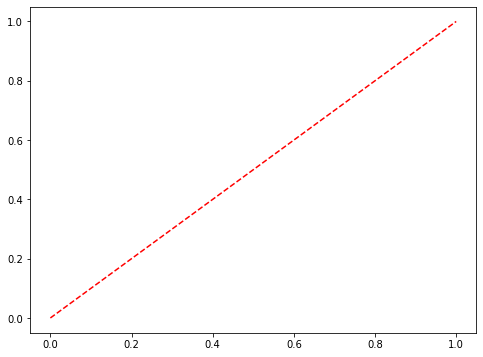

In [0]:

import matplotlib.pyplot as plt
from sklearn import metrics

plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1],'r--')

pred = preds_logreg
label = y
fpr, tpr, thresh = metrics.roc_curve(label, pred)
auc = metrics.roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="LogReg , auc="+str(round(auc,3)))

pred = preds_naive_bayes
fpr, tpr, thresh = metrics.roc_curve(label, pred)
auc = metrics.roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="NB, auc="+str(round(auc,3)))






plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("AUC-ROC SAPS II")
plt.legend(loc=0)
plt.show()


ValueError: ignored

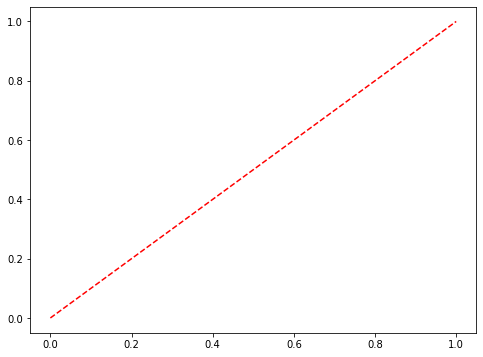

In [0]:

import matplotlib.pyplot as plt
from sklearn import metrics

plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1],'r--')

pred = preds_logreg
label = y
fpr, tpr, thresh = metrics.roc_curve(label, pred)
auc = metrics.roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="LogReg , auc="+str(round(auc,3)))

pred = preds_naive_bayes
fpr, tpr, thresh = metrics.roc_curve(label, pred)
auc = metrics.roc_auc_score(label, pred)
plt.plot(fpr,tpr,label="NB, auc="+str(round(auc,3)))







plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("AUC-ROC Clinicians")
plt.legend(loc=0)
plt.show()


In [0]:
pip install vecstack

  Created wheel for vecstack: filename=vecstack-0.4.0-cp36-none-any.whl size=19877 sha256=778f09aecd5c90d5b353b377dbe36bd10f18ab7dfb2cca474e5d7d3990f3df05
  Stored in directory: /root/.cache/pip/wheels/5f/bb/4e/f6488433d53bc0684673d6845e5bf11a25240577c8151c140e
Successfully built vecstack


In [0]:
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
		'clf__C': param_range_fl,
		'clf__solver': ['liblinear']}] 

In [0]:
pipe_lr = Pipeline([('scl', StandardScaler()),
			('clf', LogisticRegression(random_state=42))])




In [0]:
gs_lr = GridSearchCV(estimator=pipe_lr,
			param_grid=grid_params_lr,
			scoring='roc_auc',
			cv=5) 
			

In [0]:
gs_lr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scl',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                

In [0]:
print(gs_lr.best_score_)#machine
print(gs_lr.best_estimator_)#machine

0.8621436989119715
Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=42,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)


In [0]:
y_pred_prob = gs_lr.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(gs_lr, X_train, y_train, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8654597426227179


NameError: ignored

In [0]:
print(gs_lr.best_score_)#clinician
print(gs_lr.best_estimator_)#clinician

In [0]:
gbm_param_grid = {
    'clf__learning_rate': np.arange(.05, 1, .05),
    'clf__max_depth': np.arange(3,10, 1),
    'clf__n_estimators': np.arange(50, 200, 50)
}

# Perform RandomizedSearchCV
my_model = RandomizedSearchCV(estimator=pipeline,
                                        param_distributions=gbm_param_grid,
                                        n_iter=2, scoring='roc_auc', cv=5, verbose=1)

# Fit the estimator
my_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: ignored

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
from sklearn.metrics import roc_auc_score

In [0]:
print(my_model.best_score_)#smote
print(my_model.best_estimator_)#smote

0.8698195800087627
Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamm=0, gamma=0,
                               learning_rate=0.55, max_delta_step=0,
                               max_depth=3, min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=2))],
         verbose=False)


In [0]:
print(randomized_roc_auc.best_score_) #No smote
print(randomized_roc_auc.best_estimator_) No Smote

0.834068555579504
Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.25,
                               max_delta_step=0, max_depth=9,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)


In [0]:
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s


KeyboardInterrupt: ignored

In [0]:
print(clf.best_score_)
print(clf.best_estimator_)

In [0]:
pipe_lr.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [0]:
y_pred= pipe_lr.predict(X_test)

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7745652217391544

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [0]:
y_train=pd.DataFrame(y_train)

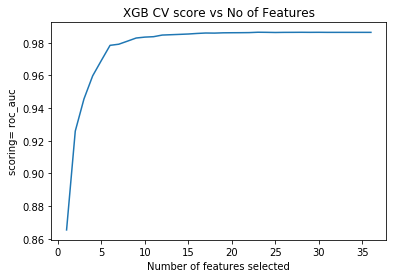

In [0]:
estimator = XGBClassifier()
selector = RFECV(estimator, step=1, min_features_to_select=1, cv=10, scoring='roc_auc')

#fit the model, get a rank of the variables, and a matrix of the selected X variables
selector = selector.fit(X_train, y_train.values.flatten())


#PLot # of features selected vs. Model Score
plt.figure()
plt.title('XGB CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel('scoring= roc_auc')
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

#get rank of X model features
rank = selector.ranking_
#Subset features to those selected by recursive feature elimination
#X_train_scaled = X_train_scaled[:,selector.support_ ] 

y_pred = selector.predict(X_train)